<a href="https://colab.research.google.com/github/brendaFlavia/DeepLearningAssignment/blob/main/LungOpacityFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import os
import PIL.Image
import pathlib
import glob
import pandas as pd
from tensorflow import keras
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models, utils, losses, callbacks
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, accuracy_score, roc_auc_score
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, Activation

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

import pathlib

#train and Validation data directory 
#train_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/train_images') 

#test data directory
#test_data_dir = pathlib.Path('/content/gdrive/My Drive/DeepLearning/test_images') 

#train and Validation data directory 
train_data_dir = pathlib.Path('/content/gdrive/MyDrive/ChestOpacity/train_images') 

#path to data set two
data_set2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2')

#path to unknown images labels
test_data_dir = pathlib.Path('/content/gdrive/MyDrive/ChestOpacity/test_images')

Mounted at /content/gdrive


In [42]:
img_width, img_height = 150,150
batch_size = 32

In [41]:
#dataset 2
test_dataset_2 = tf.keras.utils.image_dataset_from_directory(
  data_set2,
  shuffle=False,
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=224
  )

Found 224 files belonging to 2 classes.


In [43]:
# Define image data generators
# Train data


train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="training",
  color_mode='rgb',
  seed=123,
  label_mode='binary',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 715 files belonging to 2 classes.
Using 572 files for training.


In [44]:
# Validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='binary',
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 715 files belonging to 2 classes.
Using 143 files for validation.


In [45]:
#test dataset
test_data = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  shuffle=False,
  color_mode='rgb',
  image_size=(img_height, img_width),
  batch_size=50
  )


Found 50 files belonging to 1 classes.


In [46]:
# Load class names for the dataset
class_names = val_ds.class_names
print(class_names)

['normal', 'sick']


In [9]:
# Load class names for the dataset
class_names = train_ds.class_names
print(class_names)

['normal', 'sick']


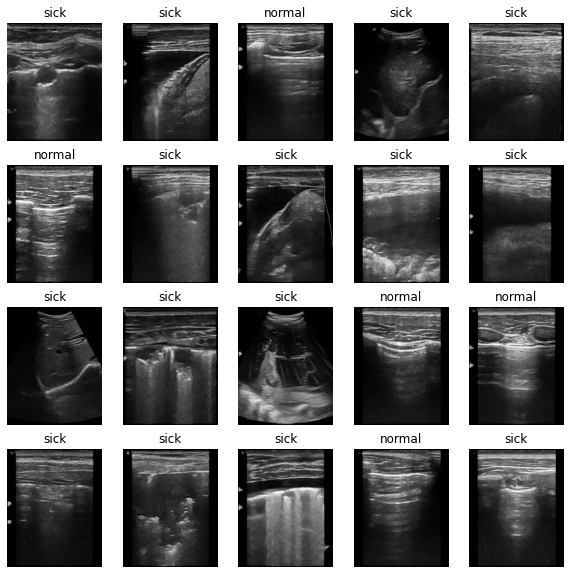

In [ ]:


plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(20):
    ax = plt.subplot(4, 5, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


Print shape of the images

In [47]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32, 1)


Normalise the images

In [48]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

Auto tune dataset for training

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)
test_dataset_2=test_dataset_2.cache().prefetch(buffer_size=AUTOTUNE)


In [49]:
#create a model
model = models.Sequential()

creat seguential model that uses rectified linear activation function. output the input directly if it is positive, otherwise, it will output zero 

In [50]:
#num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(16, 3, activation='relu',input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(2)
])

use loss function SparseCategoricalCrossentropy because it Computes the crossentropy loss between the labels and predictions

In [51]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [52]:
result=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10,
)

Epoch 1/10
18/18 [==============================] - 3s 107ms/step - loss: 0.4539 - accuracy: 0.7657 - val_loss: 0.2300 - val_accuracy: 0.8671
Epoch 2/10
18/18 [==============================] - 2s 87ms/step - loss: 0.2012 - accuracy: 0.9126 - val_loss: 0.1779 - val_accuracy: 0.9510
Epoch 3/10
18/18 [==============================] - 2s 85ms/step - loss: 0.1351 - accuracy: 0.9493 - val_loss: 0.1079 - val_accuracy: 0.9650
Epoch 4/10
18/18 [==============================] - 2s 89ms/step - loss: 0.0695 - accuracy: 0.9755 - val_loss: 0.0812 - val_accuracy: 0.9720
Epoch 5/10
18/18 [==============================] - 2s 84ms/step - loss: 0.0317 - accuracy: 0.9913 - val_loss: 0.0737 - val_accuracy: 0.9650
Epoch 6/10
18/18 [==============================] - 2s 84ms/step - loss: 0.0183 - accuracy: 0.9948 - val_loss: 0.0797 - val_accuracy: 0.9720
Epoch 7/10
18/18 [==============================] - 2s 91ms/step - loss: 0.0115 - accuracy: 0.9983 - val_loss: 0.1099 - val_accuracy: 0.9720
Epoch 8/10
1

Check Accuracy on different datasets

In [53]:
#test dataset
test_loss, test_acc = model.evaluate(test_data)

1/1 [==============================] - 0s 354ms/step - loss: 7.0897 - accuracy: 0.5200


In [32]:
#validation set
test_loss, test_acc = model.evaluate(val_ds)

8/8 [==============================] - 0s 6ms/step - loss: 0.1166 - accuracy: 0.9580


In [33]:
#train set
test_loss, test_acc = model.evaluate(train_ds)

29/29 [==============================] - 1s 37ms/step - loss: 0.0028 - accuracy: 1.0000


In [54]:
#dataset two
test_loss, test_acc = model.evaluate(test_dataset_2)

1/1 [==============================] - 1s 911ms/step - loss: 7.4734 - accuracy: 0.4464


Visualize Training and Validation Loss and Accuracy

Text(0.5, 1.0, 'Training and Validation Accuracy')

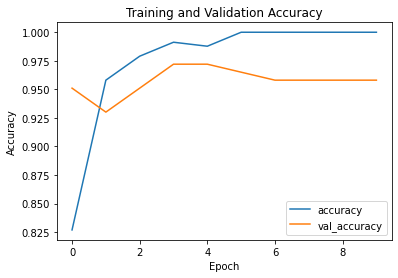

In [24]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

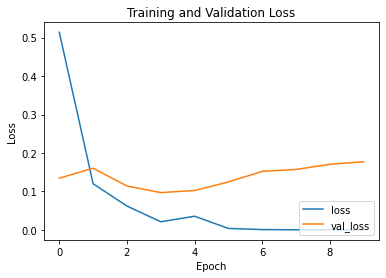

In [25]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Make Predictions on Known Images Lables

Predictions:
 [0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1
 0 1 0 1 0 1 0 0 1 1 0 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


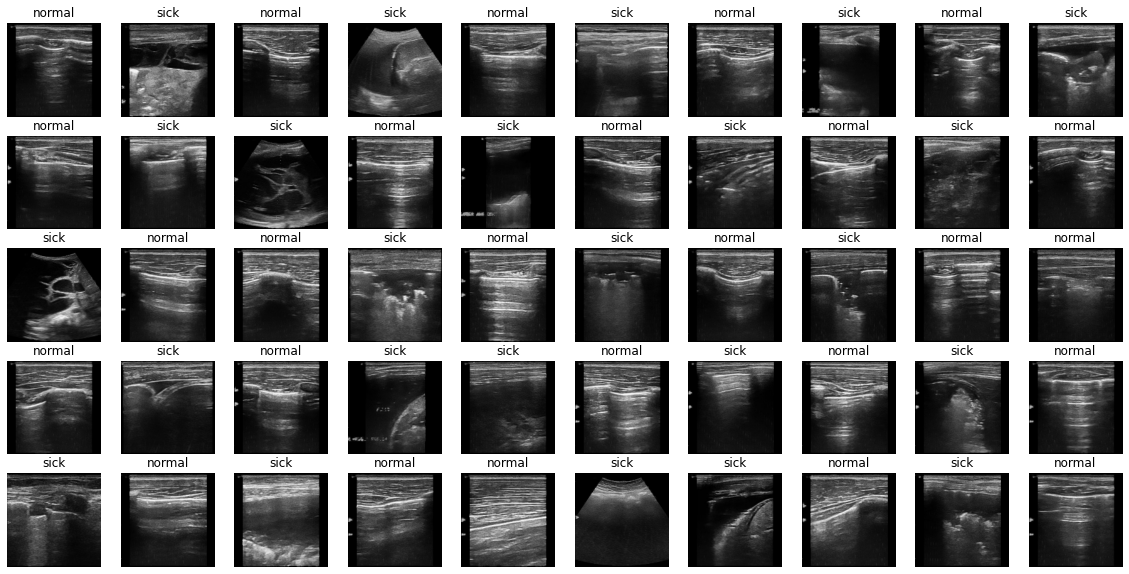

In [55]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Confusion matrix on test data

In [71]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in test_dataset_2:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)
#print (cm)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       112
           1       0.47      0.89      0.62       112

    accuracy                           0.45       224
   macro avg       0.24      0.45      0.31       224
weighted avg       0.24      0.45      0.31       224



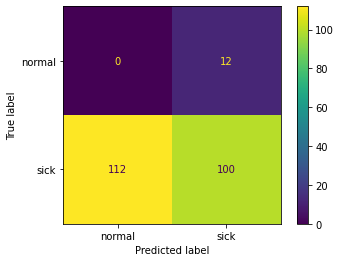

In [58]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

Confusion matrik on Dataset two

In [30]:
y_pred2 = []  # storing predicted labels
y_true2 = []  # storing true labels

for image_batch_2, label_batch_2 in test_dataset_2:
   # append true labels
   y_true2.append(label_batch_2)
   # compute predictions
   preds2 = model.predict(image_batch_2)
   # append predicted labels
   y_pred2.append(np.argmax(preds2, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels_2 = tf.concat([item for item in y_true2], axis = 0)
predicted_labels_2 = tf.concat([item for item in y_pred2], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm_2=confusion_matrix(predicted_labels_2, correct_labels_2)

In [ ]:
print(classification_report(correct_labels_2, predicted_labels_2))

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=class_names)
disp.plot()

plt.show()

Apply Data Augumentation

In [59]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

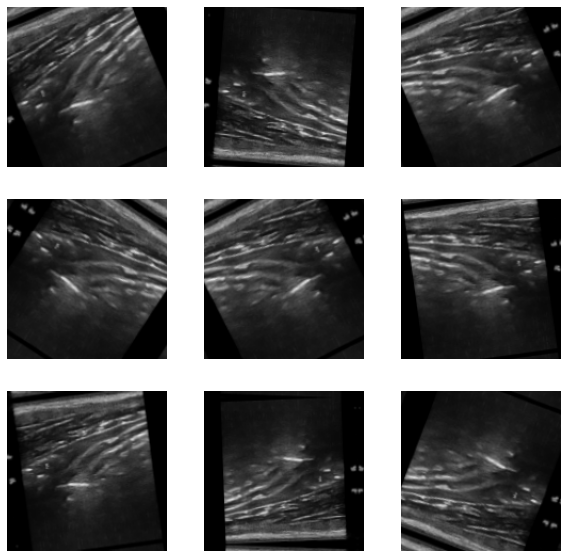

In [60]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [61]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(150, 150, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu' ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [62]:
#complie model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
#es=EarlyStopping(monitor='val_loss', mode='min',verbose=1)

In [63]:
#fit the model

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
18/18 [==============================] - 3s 97ms/step - loss: 0.6817 - accuracy: 0.6713 - val_loss: 0.5416 - val_accuracy: 0.7203
Epoch 2/20
18/18 [==============================] - 2s 90ms/step - loss: 0.4526 - accuracy: 0.8007 - val_loss: 0.3106 - val_accuracy: 0.8671
Epoch 3/20
18/18 [==============================] - 2s 88ms/step - loss: 0.3981 - accuracy: 0.8199 - val_loss: 0.3016 - val_accuracy: 0.8741
Epoch 4/20
18/18 [==============================] - 2s 89ms/step - loss: 0.3010 - accuracy: 0.8724 - val_loss: 0.1946 - val_accuracy: 0.9301
Epoch 5/20
18/18 [==============================] - 2s 87ms/step - loss: 0.2686 - accuracy: 0.8899 - val_loss: 0.3624 - val_accuracy: 0.8601
Epoch 6/20
18/18 [==============================] - 2s 90ms/step - loss: 0.2912 - accuracy: 0.8654 - val_loss: 0.4316 - val_accuracy: 0.8462
Epoch 7/20
18/18 [==============================] - 2s 90ms/step - loss: 0.2422 - accuracy: 0.9021 - val_loss: 0.1749 - val_accuracy: 0.9441
Epoch 8/20
18

Test **accuracy** Images

In [64]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)

1/1 - 0s - loss: 1.4193 - accuracy: 0.6800 - 266ms/epoch - 266ms/step


In [65]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

18/18 - 2s - loss: 0.4501 - accuracy: 0.8671 - 2s/epoch - 87ms/step


In [66]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

5/5 - 0s - loss: 0.4852 - accuracy: 0.8811 - 437ms/epoch - 87ms/step


In [67]:
test_loss, test_acc = model.evaluate(test_dataset_2)

1/1 [==============================] - 1s 663ms/step - loss: 2.5105 - accuracy: 0.5670


Visualize Training an validation Results

Text(0.5, 1.0, 'Training and Validation Accuracy')

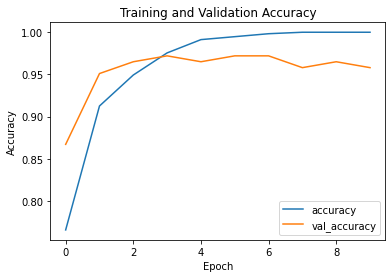

In [68]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

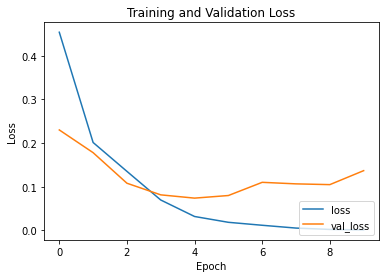

In [69]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

Classify Unknown Images

Predictions:
 [0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 0 0 0 1 0 0 1 1 0 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


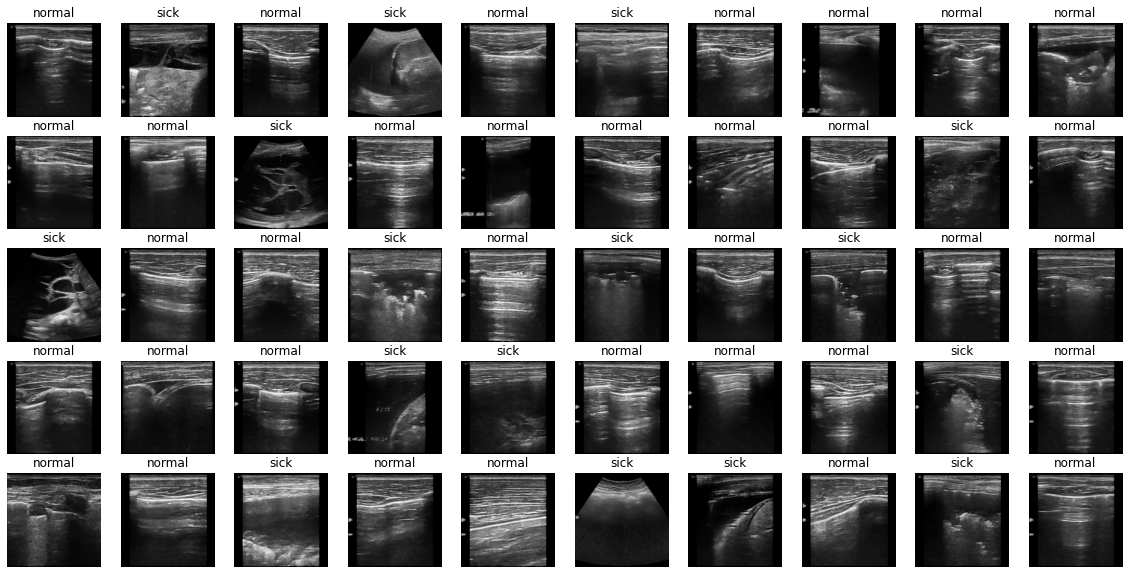

In [73]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Classification Matric

In [74]:
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.62      0.34      0.44       112
           1       0.55      0.79      0.65       112

    accuracy                           0.57       224
   macro avg       0.58      0.57      0.54       224
weighted avg       0.58      0.57      0.54       224



Confusion Matrik

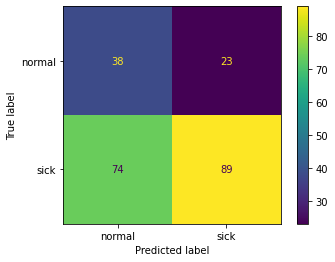

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()

**Apply L2 Regulization to reduce overfitting and dropout layer and also increase the number of layers.
Also add add a penalty for weight size to the loss function.**

In [101]:
num_classes = num_classes = len(class_names)

model = tf.keras.Sequential([
    data_augmentation,
  tf.keras.layers.Rescaling(1./255,input_shape=(150, 150, 3)),
  tf.keras.layers.Conv2D(16, 3, activation='relu', padding="same" ),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(32, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(64, 3, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Conv2D(128, 5, activation='relu', padding="same"),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [102]:
#complie model

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 rescaling_8 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 75, 75, 16)       0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 75, 75, 16)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 75, 75, 32)        4640      
                                                      

In [104]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
18/18 [==============================] - 3s 99ms/step - loss: 0.7517 - accuracy: 0.5734 - val_loss: 0.6918 - val_accuracy: 0.4825
Epoch 2/30
18/18 [==============================] - 2s 93ms/step - loss: 0.6818 - accuracy: 0.6066 - val_loss: 0.6798 - val_accuracy: 0.5245
Epoch 3/30
18/18 [==============================] - 2s 91ms/step - loss: 0.5806 - accuracy: 0.6941 - val_loss: 0.5347 - val_accuracy: 0.7343
Epoch 4/30
18/18 [==============================] - 2s 92ms/step - loss: 0.4717 - accuracy: 0.7675 - val_loss: 0.4422 - val_accuracy: 0.8042
Epoch 5/30
18/18 [==============================] - 2s 92ms/step - loss: 0.4402 - accuracy: 0.8059 - val_loss: 0.4212 - val_accuracy: 0.8531
Epoch 6/30
18/18 [==============================] - 2s 91ms/step - loss: 0.4101 - accuracy: 0.8287 - val_loss: 0.3012 - val_accuracy: 0.8881
Epoch 7/30
18/18 [==============================] - 2s 94ms/step - loss: 0.3375 - accuracy: 0.8462 - val_loss: 0.2378 - val_accuracy: 0.9161
Epoch 8/30
18

Text(0.5, 1.0, 'Training and Validation Accuracy')

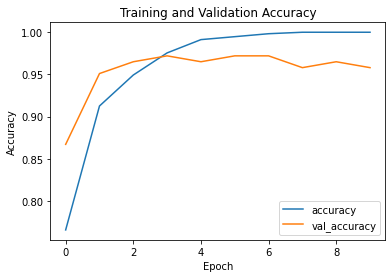

In [105]:
plt.plot(result.history['accuracy'], label='accuracy')
plt.plot(result.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Text(0.5, 1.0, 'Training and Validation Loss')

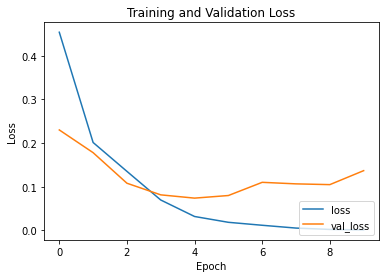

In [106]:
plt.plot(result.history['loss'], label='loss')
plt.plot(result.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

In [107]:
test_loss, test_acc = model.evaluate(val_ds, verbose=2)

5/5 - 0s - loss: 0.2327 - accuracy: 0.9091 - 449ms/epoch - 90ms/step


In [108]:
test_loss, test_acc = model.evaluate(test_data, verbose=2)

1/1 - 0s - loss: 1.9417 - accuracy: 0.6000 - 309ms/epoch - 309ms/step


In [109]:
test_loss, test_acc = model.evaluate(train_ds, verbose=2)

18/18 - 2s - loss: 0.2967 - accuracy: 0.8864 - 2s/epoch - 89ms/step


In [110]:
test_loss, test_acc = model.evaluate(test_dataset_2, verbose=2)

1/1 - 1s - loss: 2.4143 - accuracy: 0.5759 - 646ms/epoch - 646ms/step


Classify the unknown images

In [111]:
csv_data2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/image_results7.csv')


Classification of unknown images

Predictions:
 [0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 0 0 0 1 0 1 0]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


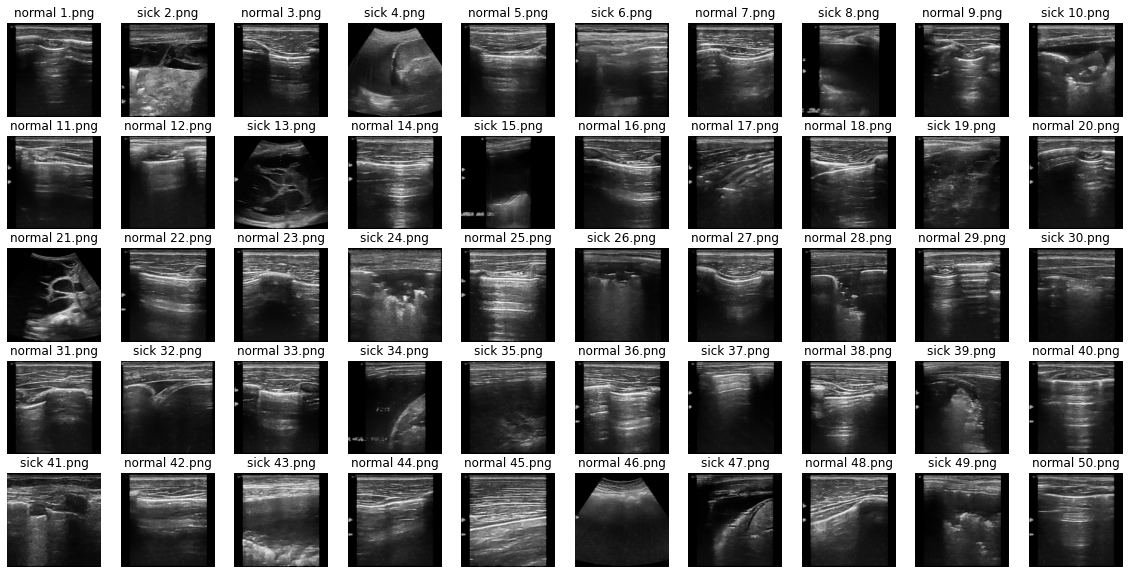

In [112]:
image_batch, label_batch = test_data.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(20, 10))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]]+ ' '+ str(i+1)+'.png')
  plt.axis("off")

SAVE RESULTS IN CSV

In [113]:
  
# display the array
print(predictions.numpy())
  
# convert array into dataframe
DF = pd.DataFrame(predictions)
  
# save the dataframe as a csv file
DF.to_csv(csv_data2)

[0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 1 0 0 0 1 0 1 0]


PREDICTIONS ON KNOWN DATASET 2

In [114]:
dataset2 = pathlib.Path('/content/gdrive/My Drive/DeepLearning/Dataset2/normal/sick_eff100.png') 


#image_path = tf.keras.utils.get_file('Known_image', origin=dataset2)

img = tf.keras.utils.load_img(
    dataset2, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to sick with a 99.61 percent confidence.


In [ ]:
test_data_set2 = pathlib.Path('/content/gdrive/MyDrive/DeepLearning/Dataset2')

In [115]:
image_batch, label_batch = test_dataset_2.as_numpy_iterator().next()
predictions = model.predict_on_batch(image_batch)

# Apply a sigmoid since our model returns logits
predictions = tf.math.argmax(predictions,1)
#predictions = tf.where(predictions < 0.5, 0, 1)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

#plt.figure(figsize=(20, 10))
#for i in range(10):
  #ax = plt.subplot(10, 10, i + 1)
  #plt.imshow(image_batch[i].astype("uint8"))
  #plt.title(class_names[predictions[i]])
  #plt.axis("off")

Predictions:
 [0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0
 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1]
Labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


Evalute model on Dataset 2

In [117]:
test_loss1, test_acc1 = model.evaluate(test_dataset_2, verbose=2)

1/1 - 1s - loss: 2.4143 - accuracy: 0.5759 - 650ms/epoch - 650ms/step


In [116]:
y_pred = []  # storing predicted labels
y_true = []  # storing true labels

for image_batch, label_batch in test_dataset_2:
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
cm=confusion_matrix(predicted_labels, correct_labels)
print (cm)

[[35 18]
 [77 94]]


In [118]:
from sklearn.metrics import classification_report
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.66      0.31      0.42       112
           1       0.55      0.84      0.66       112

    accuracy                           0.58       224
   macro avg       0.61      0.58      0.54       224
weighted avg       0.61      0.58      0.54       224



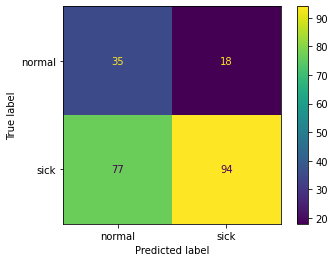

In [119]:

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=class_names)
disp.plot()

plt.show()